<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</b>
       * Очистка и подготовка данных
       * Пробразования данных: слияние, комбинирование и смена размерности
       * Комбинирование и слияние наборов данных

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

#### Пропуски
* Исходные данные редко (почти никогда) не бывает "чистыми"
* Основновными проблемами являются: __пропуски__ и __выбросы__
* Работа с неполными данными может быть организована __по разному__
* От того, как мы будем работать с этим зависит __качество__ последующей обработки
* Существенную помощь в заполнении данных оказывают __статистика__ и __графики__

#### Отчеты
* Отчет - это __"лицо"__ проведенной работы
* (очень) Усредненно отчет по данным состоит из:
    - описания __входных__ данных
    - основной части с __графиками__ и __таблицами__
    - выводов
* Наиболее распространенный элемент отчета - __сводная таблица__
* Для построения таблицы используются функции __группировки__ и __агрегирования (агрегации)__

#### Преобразования
* данные редко "доживают" до конца в неизменном виде, "перетекая" между различными датафреймами, массивами и сериями с сохранением исходного значения
* это происходит за счет __реиндексации__, __слияний__, __разделений__, __преобразование размерности__, __преобразований строк и столбцов__

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os
from numpy.random import randn
%matplotlib inline

In [74]:
import os
import os.path

## Загрузите данные с kaggle

In [75]:
# https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

In [162]:
ds = os.path.join("sudeste.csv")
df = pd.read_csv(ds)

In [163]:
df.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [164]:
df.shape

(9779168, 31)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
tmax    float64
tmin    float64
dewp    float64
dmax    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [166]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


## <font color=red>ЗАДАНИЕ</font>

Какие поля в describe "бесполезны" и почему?

In [167]:
df.wsid.unique()

array([178, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423], dtype=int64)

## <font color=red>ЗАДАНИЕ</font>

Выведите графики средней температуры и средней влажности на метеостанции 383 зависимости от даты либо в двух смежных графиках, либо на одном с правой и левой осями

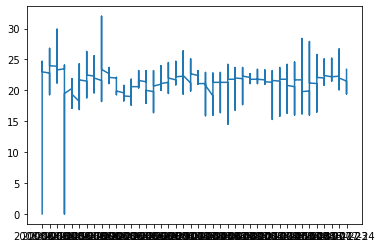

In [186]:
y = df[df.wsid == 383].temp.head(1000)
x = df[df.wsid == 383].date.head(1000)
y.shape, x.shape
plt.plot(x, y)


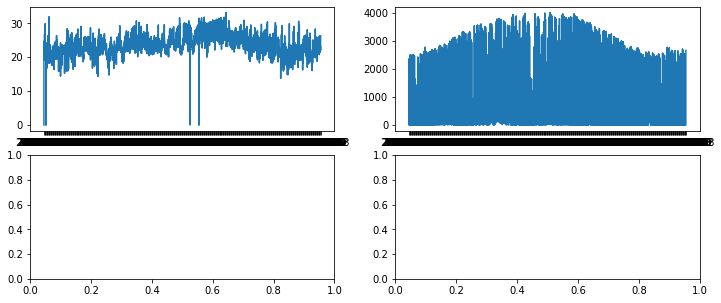

In [190]:
# Ваш код
x = df[df.wsid == 383].date.head(10000)

fig, axs = plt.subplots(2, 2, figsize=(12,5))
y = df[df.wsid == 383].temp.head(10000)
axs[0, 0].plot(x, y)
y = df[df.wsid == 383].gbrd.head(10000)
axs[0, 1].plot(x, y)


## Очистка и подготовка данных

### Работа пропущенных данных

In [78]:
string_data = pd.Series(['дыня', 'тыква', np.nan, 'помидор'])
string_data

0       дыня
1      тыква
2        NaN
3    помидор
dtype: object

In [79]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [80]:
string_data

0       None
1      тыква
2        NaN
3    помидор
dtype: object

### Фильтрация пропущенных данных

In [193]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [82]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [83]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [84]:
cleaned   # убрались записи где хотя бы одно значеие NAN - плохо. см дальше

,0,1,2
0,1.0,6.5,3.0


In [85]:
 # удаляем тольк сроки где ВСЕ поля NAN
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [86]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [87]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [88]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.904374,NaN,NaN
1,2.499404,NaN,NaN
2,-1.385831,NaN,0.586560
3,-1.660379,NaN,-0.853305
4,1.892648,0.510101,-0.951956
5,-0.364710,-0.714815,0.683428
6,1.321421,1.848453,-0.152891


In [89]:
df.dropna()
df.dropna(thresh=2)  # порог какое количество нулевых данных в строке приводит к ее удалению

,0,1,2
2,-1.385831,NaN,0.586560
3,-1.660379,NaN,-0.853305
4,1.892648,0.510101,-0.951956
5,-0.364710,-0.714815,0.683428
6,1.321421,1.848453,-0.152891


### Заполнение пропущенных данных

In [90]:
df.fillna(0)

,0,1,2
0,-0.904374,0.000000,0.000000
1,2.499404,0.000000,0.000000
2,-1.385831,0.000000,0.586560
3,-1.660379,0.000000,-0.853305
4,1.892648,0.510101,-0.951956
5,-0.364710,-0.714815,0.683428
6,1.321421,1.848453,-0.152891


In [91]:
df.fillna({1: 0.5, 2: 0})  # для первого столбца нулевые заполняем как 0.5, для второго - как 0

,0,1,2
0,-0.904374,0.500000,0.000000
1,2.499404,0.500000,0.000000
2,-1.385831,0.500000,0.586560
3,-1.660379,0.500000,-0.853305
4,1.892648,0.510101,-0.951956
5,-0.364710,-0.714815,0.683428
6,1.321421,1.848453,-0.152891


In [92]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.904374,0.000000,0.000000
1,2.499404,0.000000,0.000000
2,-1.385831,0.000000,0.586560
3,-1.660379,0.000000,-0.853305
4,1.892648,0.510101,-0.951956
5,-0.364710,-0.714815,0.683428
6,1.321421,1.848453,-0.152891


In [93]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,1.213386,-1.246284,-0.637384
1,-0.407971,0.678943,2.063958
2,1.107981,NaN,-0.141878
3,-0.025974,NaN,-0.634535
4,-1.098791,NaN,NaN
5,-1.635344,NaN,NaN


In [94]:
df.fillna(method='ffill')  # будут заполнятся последним определенным полем

,0,1,2
0,1.213386,-1.246284,-0.637384
1,-0.407971,0.678943,2.063958
2,1.107981,0.678943,-0.141878
3,-0.025974,0.678943,-0.634535
4,-1.098791,0.678943,-0.634535
5,-1.635344,0.678943,-0.634535


In [95]:
df.fillna(method='ffill', limit=2) # будут заполнятся последним определенным полем не более двухх раз

,0,1,2
0,1.213386,-1.246284,-0.637384
1,-0.407971,0.678943,2.063958
2,1.107981,0.678943,-0.141878
3,-0.025974,0.678943,-0.634535
4,-1.098791,NaN,-0.634535
5,-1.635344,NaN,-0.634535


In [96]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())  # заполняем как среднее значение. Правильно - взять регрессию по другим полям.
# Либо взять распределение из descibe чтоб ыло нормальное распределение

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Преобразования данных

### Удаление дубликатов

In [97]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [98]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [195]:
data.duplicated().value_counts()

False    4
True     1
dtype: int64

In [99]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [100]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])  # удаляет дубликаты рассматривая только по столбцу k1

,k1,k2,v1
0,one,1,0
1,two,1,1


In [101]:
data.drop_duplicates(['k1', 'k2'], keep='last')  # какое значение из дублкиатов оставлятять -last

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Преобразование данных с помощью отображения и функции

In [196]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [197]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [198]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [199]:
data['animal'] = lowercased.map(meat_to_animal)  # новой колонкой мапим значение из food на meat_to_animal
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [106]:
data['food'].map(lambda x: meat_to_animal[x.lower()])  # тоже самое через lambda

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Замена значений

In [107]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [108]:
data.replace(-999, np.nan)  # замена значений

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [109]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [110]:
data.replace({-999: np.nan, -1000: 0})  # задаем словарь для замены знчений

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Переименование индексов осей

In [202]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [203]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [204]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [210]:
data.rename(index=str.title, columns=str.upper)  # пережаем функции с одним параметром str.title и str.upper

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [206]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [116]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Дискретизация и раскладка по "корзинам"

In [117]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [118]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)  # разбиение ages по карзинам исходя из того в какие полуинтервалы попадают значения из ages
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [119]:
cats.codes
cats.categories
pd.value_counts(cats)  # смотрим сколько значений куда попало - отлично для фильтров в dataset-ах

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [120]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [121]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior'] # присваиваем корзинам наименования
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [214]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)  # задаем количество (4) корзины равномерно распределенных

[(0.75, 0.99], (0.02, 0.26], (0.02, 0.26], (0.51, 0.75], (0.26, 0.51], ..., (0.02, 0.26], (0.02, 0.26], (0.02, 0.26], (0.75, 0.99], (0.02, 0.26]]
Length: 20
Categories (4, interval[float64]): [(0.02, 0.26] < (0.26, 0.51] < (0.51, 0.75] < (0.75, 0.99]]

In [123]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles  аналогично предыдущ примеру
cats
pd.value_counts(cats)

(0.647, 2.907]       250
(-0.0151, 0.647]     250
(-0.651, -0.0151]    250
(-3.602, -0.651]     250
dtype: int64

In [124]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.374, -0.0151], (-0.0151, 1.255], (1.255, 2.907], (-0.0151, 1.255], (-1.374, -0.0151], ..., (-1.374, -0.0151], (-1.374, -0.0151], (-3.602, -1.374], (-0.0151, 1.255], (-0.0151, 1.255]]
Length: 1000
Categories (4, interval[float64]): [(-3.602, -1.374] < (-1.374, -0.0151] < (-0.0151, 1.255] < (1.255, 2.907]]

### Детектирование и фильтрация выборосов

In [215]:
# фльтрация выбросов делаются руками
# поиск выбросов - автоматически

In [218]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.033743,0.010066,0.001333,0.020527
std,0.998963,1.015998,1.030680,0.990000
min,-3.115147,-3.172559,-3.110586,-3.052767
25%,-0.698689,-0.714503,-0.667420,-0.682065
50%,-0.042018,0.042802,-0.025587,0.019570
75%,0.678867,0.709983,0.727016,0.730700
max,3.147677,3.917915,3.564782,2.927151


In [219]:
col = data[2]
col[np.abs(col) > 3]  # показывает те, где значения по модулю выходят за 3

207   -3.110586
395   -3.044104
680    3.065604
694    3.564782
Name: 2, dtype: float64

In [127]:
data[(np.abs(data) > 3).any(1)]  # хотя бы в одном (any(1)) из столбцов находится такое значение (np.abs(data) > 3)

,0,1,2,3
179,0.317037,3.113509,0.809990,0.074357
208,-3.236475,-1.032303,-1.588646,0.677444
265,-0.646909,-3.043252,-1.308404,0.528237
365,-3.102366,0.676039,0.379793,0.841368
377,2.480712,-0.474079,-0.837391,-3.151309
407,1.996138,0.606271,3.723877,1.371366
413,-0.621154,-0.312451,-0.266679,-3.172472
526,-1.760111,-0.037328,-0.336004,3.578126
626,-0.182957,-0.361490,-3.094977,0.047327
686,-3.139269,-0.232938,-0.323537,0.289446


In [128]:
data[np.abs(data) > 3] = np.sign(data) * 3  # присваиваем 3 с соответств. знаком
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.016174,0.004201,-0.026119,-0.020619
std,1.021017,1.026410,0.993183,0.974291
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.700116,-0.700380,-0.708536,-0.703510
50%,0.049375,0.002703,-0.026792,-0.023332
75%,0.674753,0.695926,0.666481,0.700388
max,2.992584,3.000000,3.000000,3.000000


In [129]:
np.sign(data).head()

,0,1,2,3
0,1.0,1.0,-1.0,1.0
1,1.0,-1.0,1.0,-1.0
2,-1.0,1.0,1.0,-1.0
3,1.0,-1.0,1.0,-1.0
4,1.0,1.0,1.0,1.0


### Перестановка и случайная выборка

In [220]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)  # берем случайную выборку
sampler

array([3, 2, 4, 1, 0])

In [221]:
df
df.take(sampler)
# переставлем индекс по случаной выборке sample

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3


In [227]:
df.sample(n=3)  # выбираем 3 рандомных значений

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
1,4,5,6,7


In [223]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)   # заменяем значения на случайные
draws

4    4
0    5
1    7
3    6
1    7
4    4
0    5
0    5
0    5
1    7
dtype: int64

### Вычисление индикативных (знаковых) переменных

In [228]:
# имеют значений 1или 0 по отношениию к другому признаку

In [231]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
print(df)
pd.get_dummies(df['key'])  # категарийную переменную преобразует в 1или0. Категории делает столбцами

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [230]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)  # по нескольким столбцам. задаем префикс
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [234]:
mnames = ['movie_id', 'title', 'genres']
ml_1m = os.path.join("movies.dat")
#movies = pd.read_table(ml_1m, sep='::', header=None, names=mnames)
movies = pd.read_csv(ml_1m, sep='::', header=None, names=mnames, engine='python')
movies[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'movies.dat'

In [240]:
# каждый фильм относится к нескольким категориям- решаем это
# в одном столбце записаны все категории фильмы

In [241]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))  # извлекаем все категрии 
genres = pd.unique(all_genres)  # все уникальные категории

NameError: name 'movies' is not defined

In [ ]:
genres

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))  # [колич фильмов x категории]
dummies = pd.DataFrame(zero_matrix, columns=genres)  # преоразовали массив в df чтоб работать как с df

In [ ]:
gen = movies.genres[0]  # извлекаем из первой записи категории фильмов
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))  # получаем для них индексы (для трех полученных категорий)

In [ ]:
# на первой записи отработали как будем работать с этими категориями
# теперь делаем это для всех записей
for i, gen in enumerate(movies.genres):  
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1   # в матрице фильмы X категории проставляем 1 там где фильм относится к определенному жанру

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

In [ ]:
np.random.seed(12345)
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))  # принадлежность к корзине делаем бинарным признаком

### Векторизация строковых операций в pandas

In [246]:
import re

In [247]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [248]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [249]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [250]:
# Важно! За findall находится re, без него не заработает
import re

pattern = '.*ve'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave      [dave]
Steve    [steve]
Rob           []
Wes          NaN
dtype: object

In [251]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches, type(matches)

(Dave      True
 Steve     True
 Rob      False
 Wes        NaN
 dtype: object, pandas.core.series.Series)

In [252]:
matches.str.get(1)
matches.str[0]

AttributeError: Can only use .str accessor with string values!

In [253]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

## <font color=red>ЗАДАНИЕ</font>

* Какие  поля требуется заполнять
* Почему?
* Как Вы их будете заполнять?


In [ ]:
# Ваш код


## Пробразования данных: слияние, комбинирование и смена размерности

### Иерархическая индексация

In [504]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])  # Многоуровневые индексы. Являются несколькими ПАРАЛЕЛЛЬНЫМИ индексами
data

a  1    0.673307
   2   -1.795326
   3    1.004452
b  1    1.861778
   3    1.044585
c  1    0.678675
   2   -0.395537
d  2   -1.797008
   3    0.734608
dtype: float64

In [505]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [506]:
data['b']

1    1.861778
3    1.044585
dtype: float64

In [507]:
data['b':'c']

b  1    1.861778
   3    1.044585
c  1    0.678675
   2   -0.395537
dtype: float64

In [508]:
data.loc[['b', 'd']]

b  1    1.861778
   3    1.044585
d  2   -1.797008
   3    0.734608
dtype: float64

In [509]:
data.loc[:, 2]

a   -1.795326
c   -0.395537
d   -1.797008
dtype: float64

In [510]:
data.unstack()  

,1,2,3
a,0.673307,-1.795326,1.004452
b,1.861778,NaN,1.044585
c,0.678675,-0.395537,NaN
d,NaN,-1.797008,0.734608


In [511]:
data.unstack().stack()

a  1    0.673307
   2   -1.795326
   3    1.004452
b  1    1.861778
   3    1.044585
c  1    0.678675
   2   -0.395537
d  2   -1.797008
   3    0.734608
dtype: float64

In [512]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])  # на коонки также создаем мультиИндекс
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [513]:
# rename
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [514]:
frame['Ohio']  # выборка по одному штату

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [515]:
# содаем многомерный индекс отдельно от df
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

### Переупорядочивание и сортировка уровней

In [516]:
frame.swaplevel('key1', 'key2')  # меняет местами уровни многоуровневой индексации

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [517]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [518]:
frame.sort_index(level=1) # сортируем по индексу

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [519]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Суммарная статистика по индексу

In [520]:
frame.sum(level='key2')  # суммирование значения по уровню
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [521]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [522]:
frame2 = frame.set_index(['c', 'd'])   # c/d - стали мультиИндексами. Теперь по ним нельзя делать фильтрацию
# но можно сделать stack() unstack() чтоб вернуть все обратно
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [528]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [529]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Комбинирование и слияние наборов данных

### Слияние в стиле реляционной СУБД

In [530]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [526]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [532]:
pd.merge(df1, df2)  # слияние двух df
# по умолчанию слияние по ключу

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [533]:
pd.merge(df1, df2, on='key')   # колнка по которй идет слияние

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [534]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')  

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [536]:
pd.merge(df1, df2, how='outer')  # how- способ мержа аналогично sql

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [537]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [538]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [539]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [540]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [541]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [542]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Слияние по индексу

In [543]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [544]:
right1

,group_val
a,3.5
b,7.0


In [545]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [546]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [547]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [548]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [551]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [552]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [553]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [554]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [555]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [556]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [557]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [558]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [559]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [560]:
#left2.join([right2, another], how='outer')
left2.join([right2, another], how='outer', sort=True)

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Объединение вдоль осей

In [669]:

arr = np.arange(12).reshape((3, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [673]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [674]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [675]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [676]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [677]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [678]:
pd.concat([s1, s2, s3], axis=1, sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [679]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [680]:
pd.concat([s1, s4], axis=1, sort=True)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [681]:
pd.concat([s1, s4], axis=1, join='inner', sort=True)

,0,1
a,0,0
b,1,1


In [682]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']], sort=True)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [683]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [684]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [685]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [686]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort=True)

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [687]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [688]:
df2

,three,four
a,5,6
c,7,8


In [689]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort=True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [690]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [691]:
#pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
#          names=['upper', 'lower'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'], sort=True)

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [692]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

,a,b,c,d
0,-0.618544,-1.292020,0.191593,-1.250806
1,-0.277958,-0.010793,-0.975733,0.816091
2,0.602698,0.543880,1.358233,0.246422


In [693]:
df2

,b,d,a
0,-1.622927,0.305260,-1.160447
1,1.760364,0.975002,0.339036


In [694]:
pd.concat([df1, df2], ignore_index=True, sort=True)

,a,b,c,d
0,-0.618544,-1.292020,0.191593,-1.250806
1,-0.277958,-0.010793,-0.975733,0.816091
2,0.602698,0.543880,1.358233,0.246422
3,-1.160447,-1.622927,NaN,0.305260
4,0.339036,1.760364,NaN,0.975002


### Комбинирование данных с перекрытием

In [695]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [696]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [697]:
np.where(pd.isnull(a), b, a)  # np.where -фильтрует значения в массиве. Именно NUMPY, т.к. в pandas логика обратная.
# если pd.isnull(a) - верное то оставляем значение из a, иначе из b

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [701]:
b[:-2].combine_first(a[2:])  # скомбинируем элементы из первой и вторйо серии.
# оставяляем значение из первого если оно определено

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [702]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [703]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [704]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Изменение размерностей и "повороты"

### Иерархическое индексирование и reshaping

In [705]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [708]:
result = data.stack()
result  # data была df, а data.stack() стала серией

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [709]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [710]:
result.unstack(0)
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [711]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [712]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [713]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [715]:
data2.unstack()  # unstack() выдергивает первый уровень индексов. Но после первого unstack()оистался только нулевой. поэтому результат не изменился

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [716]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [717]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [718]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [719]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [720]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Поворот из "длинного" в "широкий" формат

In [748]:
data = pd.read_csv('macrodata.csv')
data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [749]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')  # Периодический индекс - доп индекс который использует год+квартал
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [750]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')  # Новый индекс
data = data.reindex(columns=columns)  # реиндексируем по новому индекс
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [751]:
data.index

RangeIndex(start=0, stop=203, step=1)

In [752]:
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [753]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [754]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [755]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.132426
1,1959-03-31 23:59:59.999999999,infl,0.000,0.684068
2,1959-03-31 23:59:59.999999999,unemp,5.800,1.820147
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.446637
4,1959-06-30 23:59:59.999999999,infl,2.340,1.357619
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.443843
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,1.651261
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.894190
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.792575
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.259344


In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### Поворот из "широкого" в "длинный" формат

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

In [ ]:
reshaped.reset_index()

In [ ]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

## Агрегирование данных и групповые операции

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Итерация по группам|

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print(dtype)
    print(group)

### Выбор колонок или их подмножества

```python

df.groupby('key1')['data1'] 
df.groupby('key1')[['data2']]

является более удобной формой записи (syntactit sugar) для

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])
```

In [138]:
df.groupby(['key1', 'key2'])[['data2']].mean()

KeyError: 'key1'

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

### Группировка по словарям и сериям

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

### Группировка с функциями

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Группировка по уровням индекса

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

### Агрегирование данных

In [ ]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

### Применение функции к столбцу и применение нескольких функций

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Возврат агрегированных двнных без строчных индексов

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

## Применение: разделить - применить - скомбинировать

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:

result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

### Подавление групповых ключей

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Анализ по квартилям и козинам

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Пример: заполнение отсутствущих значений с значениями, определенными для группы

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [139]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -1.268690
New York      0.348747
Vermont      -1.518004
Florida       0.086188
Oregon       -0.116522
Nevada        0.723206
California   -0.570024
Idaho        -0.526775
dtype: float64

In [140]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

East   -0.277918
West   -0.343273
dtype: float64

In [141]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -1.268690
New York      0.348747
Vermont      -0.277918
Florida       0.086188
Oregon       -0.116522
Nevada       -0.343273
California   -0.570024
Idaho        -0.343273
dtype: float64

In [142]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -1.268690
New York      0.348747
Vermont       0.500000
Florida       0.086188
Oregon       -0.116522
Nevada       -1.000000
California   -0.570024
Idaho        -1.000000
dtype: float64

### Пример: случайная выборка и перестановки

In [143]:

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [144]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [145]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

8H    8
6D    6
7H    7
5C    5
3S    3
dtype: int64

In [146]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  QC     10
   7C      7
D  7D      7
   2D      2
H  QH     10
   7H      7
S  AS      1
   10S    10
dtype: int64

In [147]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

6C     6
KC    10
AD     1
KD    10
JH    10
6H     6
2S     2
3S     3
dtype: int64

### Пример: взвешенное по группе среднее и корреляция

In [148]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.885433,0.430217
1,a,-0.294691,0.438261
2,a,0.537502,0.361633
3,a,1.259305,0.520051
4,b,0.088281,0.672096
5,b,1.532340,0.215270
6,b,0.108265,0.562920
7,b,-0.615677,0.853737


In [149]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.193811
b   -0.032761
dtype: float64

In [150]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [151]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [152]:
rets = close_px.pct_change().dropna()

In [153]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [154]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Пример: линейная регрессия по группам

In [155]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [156]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### Сводные таблицы и таблицы с разделением полей табуляцией (crosstab)

In [157]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#data = pd.read_table(StringIO(data), sep='\s+')
data = pd.read_csv(StringIO(data), sep='\s+')


In [158]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [159]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [160]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

NameError: name 'tips' is not defined

## По следующим занятиям

### 9-е занятие: 
* тестовая EDA 
* коллоквикум по EDA на учебном примере с kaggle

### Для подготовки: 
* Внимательно пересмотреть материал это и 2 предыдущих занятия
* Посмотреть dataset и kernels для Титаника на kaggle

## Экзаменационные вопросы:
* Очистка и подготовка данных
* Пробразования данных: слияние, комбинирование и смена размерности
* Комбинирование и слияние наборов данных
* Подход "разделить - применить - скомбинировать"